In [1]:
import numpy as np
import pandas as pd

# **Read Dataset**


In [2]:
dataset =pd.read_csv("/storage/emulated/0/Android/data/ru.iiec.pydroid3/files/file.csv")
print(dataset.head(15))

    age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad 

In [3]:
dataset.shape

(48842, 15)

In [4]:
#null values 
#Mean Median Mode Arbitrary 
dataset.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
dataset=dataset[dataset['workclass']!='Without-pay']
dataset=dataset[dataset['workclass']!='Never-worked']
print(dataset['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


# **Visualizing Age Trends**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [10]:
# Histogram to visualize the distribution of the 'Age' column
plt.figure(figsize=(10, 4))
plt.hist(dataset['age'], bins=20, color='#66C2A5', edgecolor='black')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
#Age Density Visualization
plt.figure(figsize=(10, 4))
sns.kdeplot(dataset['age'], fill=True, color='#FC8D62')
plt.title("Age Density Plot", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

# **Visualizing Salary Trends**

In [16]:
# Histogram to visualize the distribution of the 'Salary' column
plt.figure(figsize=(10, 4))
plt.hist(dataset['income'], bins=20, color='#66C2A5', edgecolor='black')
plt.title("Salary Distribution", fontsize=16)
plt.xlabel("Salary", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Salary Boxplot Overview
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['income'], color='#66C2A5')
plt.title("Salary Distribution Boxplot", fontsize=16)
plt.xlabel("Salary", fontsize=14)
plt.show()

# **Visualizing Years Of Experience Trends**

# **Exploring Gender Representation**

In [25]:
# Gender Distribution Visualization (Pie Chart)
plt.figure(figsize=(4, 8))
gender_counts = dataset['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66C2A5', '#FC8D62'])
plt.title("Gender Distribution", fontsize=16)
plt.show()

# **Exploring Education Level Representation**

In [28]:
# Education Level Distribution (Bar Plot)
plt.figure(figsize=(10, 4))
sns.countplot(x='education', data=dataset, color='#66C2A5')
plt.title("Education Level Distribution", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# **Data Quality Overview**

In [29]:
#  missing values
print("----- Missing Values -----")
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])
print("--------------------------")

#  duplicate values
print("----- Duplicate Values -----")
duplicate_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print("---------------------------")

#  dataset data types
print("----- Data Types -----")
print(dataset.dtypes)
print("----------------------")

print(dataset.info)

----- Missing Values -----
Series([], dtype: int64)
--------------------------
----- Duplicate Values -----
Number of duplicate rows: 52
---------------------------
----- Data Types -----
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object
----------------------
<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18        

# **Standardizing Job Titles & Education**

# **Replace Other By The Mode Of Gender**

In [36]:
# replace other by the mode of Gender
dataset['gender'] = dataset['gender'].replace('Other', dataset['gender'].mode()[0]  )
print(dataset['gender'].value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


# **Data Preparation: Handling Inconsistencies and Duplicates**

# **Interactive Data Views**

# **Feature Encoding**

In [20]:
# Apply One-Hot Encoding on 'Job Title' column
one_hot_encoded = pd.get_dummies(dataset['Job Title'], prefix='Job_Title')
# Drop the original 'Job Title' column from the dataset
dataset = dataset.drop(columns=['Job Title'])
# Merge the original dataset (without 'Job Title') with the one-hot encoded columns
dataset_encoded = pd.concat([dataset, one_hot_encoded], axis=1)
# Apply Label Encoding to 'Education Level' and 'Gender' columns
dataset_encoded['Education Level'] = LabelEncoder().fit_transform(dataset_encoded['Education Level'])
dataset_encoded['Gender'] = LabelEncoder().fit_transform(dataset_encoded['Gender'])
# Ensure that 'Salary' column is the last column in the dataset
# Get all columns except 'Salary'
cols = [col for col in dataset_encoded.columns if col != 'Salary']
# Reorder the columns with 'Salary' at the end
dataset_encoded = dataset_encoded[cols + ['Salary']]
dataset_encoded.head()

,Age,Gender,Education Level,Years of Experience,Job_Title_Back end Developer,Job_Title_Content Marketing Manager,Job_Title_Data Analyst,Job_Title_Data Scientist,Job_Title_Digital Marketing Manager,Job_Title_Director of HR,...,Job_Title_Senior HR Generalist,Job_Title_Senior Human Resources Manager,Job_Title_Senior Product Marketing Manager,Job_Title_Senior Project Engineer,Job_Title_Senior Software Engineer,Job_Title_Software Developer,Job_Title_Software Engineer,Job_Title_Software Engineer Manager,Job_Title_Web Developer,Salary
0,32.0,1,0,5.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,90000.0
1,28.0,0,2,3.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,65000.0
2,45.0,1,3,15.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150000.0
3,36.0,0,0,7.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,60000.0
4,52.0,1,2,20.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,200000.0


# **Data Split and Scaling**

In [28]:
from sklearn.model_selection import train_test_split
X = dataset_encoded.iloc[:, :-1].values
Y = dataset_encoded.iloc[:,-1].values
X = X.astype(np.float64)
Y = Y.astype(np.float64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(f"X_train : {X_train.shape}")
print(f"Y_train : {Y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"Y_test : {Y_test.shape}")

  # Scaling [standing scaling]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
Standared_X_train=scaler.transform(X_train)
Standared_X_test=scaler.transform(X_test)

X_train : (1432, 44)
Y_train : (1432,)
X_test : (359, 44)
Y_test : (359,)


# **Linear Regression Model**

Linear Regression : RMSE: 21639.32047329214
Linear Regression : MSE: 468260190.54584044
Linear Regression : MAE: 16011.088451086916
Linear Regression : R²: 0.8292672887259455
--------------------------------------------------------------------------


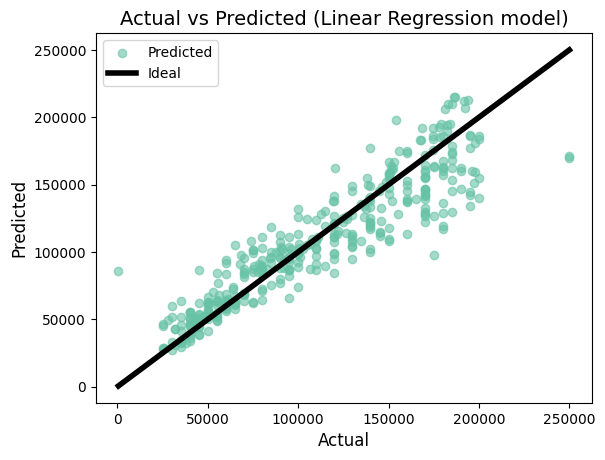

--------------------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
80000.000000,72890.250760,7109.749240
190000.000000,162077.297582,27922.702418
90452.000000,104073.278630,13621.278630
193964.000000,212977.467809,19013.467809
65000.000000,63824.000899,1175.999101


In [49]:
# linear regression model
mymodel=LinearRegression()
mymodel.fit(Standared_X_train,Y_train)
Y_predict_Linear_regression=mymodel.predict(Standared_X_test)

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score,accuracy_score
mean_absolute_error(Y_test,Y_predict_Linear_regression)
mean_squared_error(Y_test,Y_predict_Linear_regression)
r2_score(Y_test,Y_predict_Linear_regression)
np.sqrt(mean_squared_error(Y_test, Y_predict_Linear_regression))

print(f"Linear Regression : RMSE: {np.sqrt(mean_squared_error(Y_test, Y_predict_Linear_regression))}")
print(f"Linear Regression : MSE: {mean_squared_error(Y_test,Y_predict_Linear_regression)}")
print(f"Linear Regression : MAE: {mean_absolute_error(Y_test,Y_predict_Linear_regression)}")
print(f"Linear Regression : R²: {r2_score(Y_test,Y_predict_Linear_regression)}")
print("--------------------------------------------------------------------------")
plt.scatter(Y_test, Y_predict_Linear_regression, color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Linear Regression model)', fontsize=14)
plt.legend()
plt.show()
print("--------------------------------------------------------------------------")
#Linear Regression
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Linear_regression,
    'Absolute Error': np.abs(np.array(Y_test) - np.array( Y_predict_Linear_regression))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table



# **decision Tree Model**

Decision Tree: RMSE: 19887.12015419505
Decision Tree: MSE: 395497548.02739096
Decision Tree: MAE: 12964.09330612984
Decision Tree: R²: 0.8557973322518717
---------------------------------------------------------------


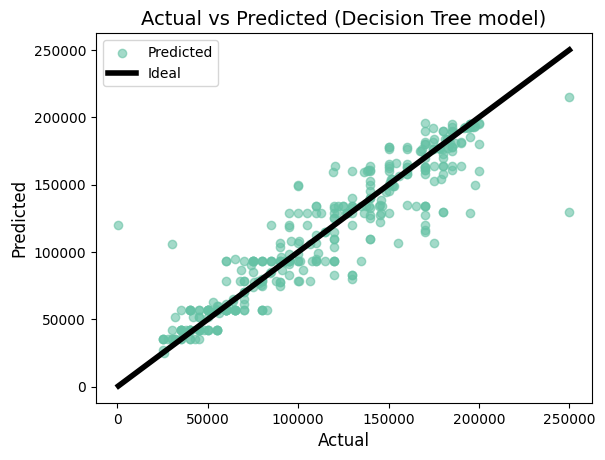

---------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
80000.000000,78555.969697,1444.030303
190000.000000,164181.944444,25818.055556
90452.000000,95996.000000,5544.000000
193964.000000,192292.000000,1672.000000
65000.000000,57228.685484,7771.314516


In [50]:
# Decision Tree model

dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dt_model.fit(Standared_X_train,Y_train)
Y_predict_Decision_Tree= dt_model.predict(Standared_X_test)

mean_squared_error(Y_test,Y_predict_Decision_Tree)
mean_absolute_error(Y_test,Y_predict_Decision_Tree)
np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))
dt_model.score(Standared_X_test,Y_test)
print(f"Decision Tree: RMSE: {np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))}")
print(f"Decision Tree: MSE: {mean_squared_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: MAE: {mean_absolute_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: R²: {dt_model.score(Standared_X_test,Y_test)}")
print("---------------------------------------------------------------")


plt.scatter(Y_test,Y_predict_Decision_Tree , color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Decision Tree model)', fontsize=14)
plt.legend()
plt.show()
print("---------------------------------------------------------------")

#Decision tree
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Decision_Tree,
    'Absolute Error': np.abs(np.array(Y_test) - np.array( Y_predict_Decision_Tree))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table




# **Random Forest Model**

Random Forest: RMSE: 16996.456622250073
Random Forest: MSE: 288879537.7120284
Random Forest: MAE: 10834.394895332152
Random Forest: R²: 0.894671407689649
----------------------------------------------------------------------------


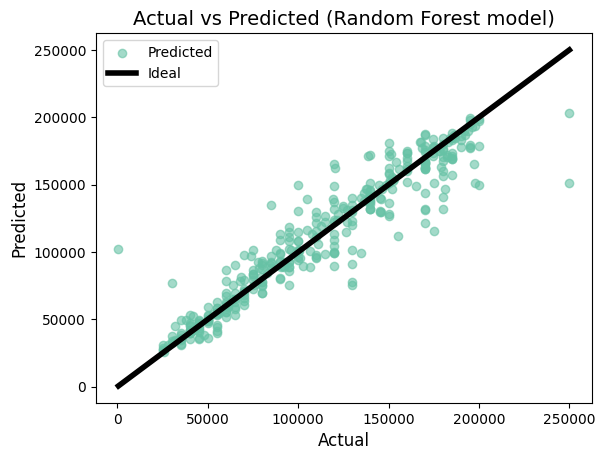

----------------------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
80000.000000,78000.000000,2000.000000
190000.000000,183500.000000,6500.000000
90452.000000,88742.270833,1709.729167
193964.000000,190179.350000,3784.650000
65000.000000,59354.166667,5645.833333


In [51]:
# Random Forest model

rf_model = RandomForestRegressor(n_estimators=20)
rf_model.fit(Standared_X_train,Y_train)
rf_model.score(Standared_X_test,Y_test)
Y_predict_Random_Forest = rf_model.predict(Standared_X_test)


mean_squared_error(Y_test,Y_predict_Random_Forest)
mean_absolute_error(Y_test,Y_predict_Random_Forest)
np.sqrt(mean_squared_error(Y_test,Y_predict_Random_Forest ))
rf_model.score(Standared_X_test,Y_test)

print(f"Random Forest: RMSE: {np.sqrt(mean_squared_error(Y_test, Y_predict_Random_Forest))}")
print(f"Random Forest: MSE: {mean_squared_error(Y_test,Y_predict_Random_Forest)}")
print(f"Random Forest: MAE: {mean_absolute_error(Y_test,Y_predict_Random_Forest)}")
print(f"Random Forest: R²: {rf_model.score(Standared_X_test,Y_test)}")
print("----------------------------------------------------------------------------")

plt.scatter(Y_test, Y_predict_Random_Forest, color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Random Forest model)', fontsize=14)
plt.legend()
plt.show()
print("----------------------------------------------------------------------------")

# random forest
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Random_Forest,
    'Absolute Error': np.abs(np.array(Y_test) - np.array(Y_predict_Random_Forest))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table


# **Comparison between Regression, Decision Tree, and Random Forest**

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming `Y_test` and the predicted results are defined
models = {
    "Random Forest": Y_predict_Random_Forest,
    "Decision Tree": Y_predict_Decision_Tree,
    "Linear Regression": Y_predict_Linear_regression,
}

# Initialize the metrics dictionary
metrics = {"Model": [], "R²": [], "MAE": [], "MSE": [], "RMSE": []}

# Calculate metrics for each model
for model_name, y_pred in models.items():
    metrics["Model"].append(model_name)
    metrics["R²"].append(r2_score(Y_test, y_pred))
    metrics["MAE"].append(mean_absolute_error(Y_test, y_pred))
    metrics["MSE"].append(mean_squared_error(Y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(Y_test, y_pred)))

# Create a DataFrame to display the metrics
df = pd.DataFrame(metrics)

# Style the DataFrame for better presentation
styled_df = (
    df.style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Model Performance Metrics")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('width', '100%'), ('border-collapse', 'collapse')]}
        ]
    )
    .hide(axis="index")  # Hide the index for a cleaner look
)

styled_df


Model,R²,MAE,MSE,RMSE
Random Forest,0.892653,10801.950462,294414796.290136,17158.519642
Decision Tree,0.855797,12964.093306,395497548.027391,19887.120154
Linear Regression,0.829267,16011.088451,468260190.545840,21639.320473


# **Predicting Salary Based on User Input with Preprocessing and Model Prediction**

In [38]:
import numpy as np
import warnings

def get_user_input_and_predict(one_hot_encoded, scaler, model):
    # Ignore warnings
    warnings.filterwarnings("ignore")

    print("Please enter the following details to predict your salary:")

    # User input for features with validation
    while True:
        try:
            age = float(input("Age between (21-80): "))
            if age < 21 or age > 80:
                raise ValueError("Age must be between 21 and 80.")
            break
        except ValueError as e:
            print(e)

    while True:
        try:
            years_of_experience = float(input("Years of Experience between (0-50): "))
            if years_of_experience < 0 or years_of_experience > 50:
                raise ValueError("Years of Experience must be between 0 and 50.")
            break
        except ValueError as e:
            print(e)

    while True:
        gender = input("Gender (Male/Female): ").strip().lower()
        if gender not in ['male', 'female']:
            print("Please enter 'Male' or 'Female'.")
        else:
            gender_encoded = 1 if gender == 'male' else 0
            break

    while True:
        education_level = input("Education Level (Bachelor's Degree/Master's Degree/PhD): ").strip()
        if education_level not in ["Bachelor's Degree", "Master's Degree", "PhD"]:
            print("Please enter a valid education level.")
        else:
            education_levels = {
                "Bachelor's Degree": 0,
                "Master's Degree": 1,
                "PhD": 2
            }
            education_encoded = education_levels[education_level]
            break

    job_title = input("Job Title: ").strip()
    job_title_encoded = np.zeros(len(one_hot_encoded.columns))
    if job_title in one_hot_encoded.columns:
        job_title_encoded[one_hot_encoded.columns.get_loc(job_title)] = 1
    else:
        if 'Job_Title_Other' in one_hot_encoded.columns:
            job_title_encoded[one_hot_encoded.columns.get_loc('Job_Title_Other')] = 1  # For unknown job titles
        else:
            raise ValueError("The job title is not recognized and 'Job_Title_Other' column is missing.")

    input_data = np.array([[age, years_of_experience, gender_encoded, education_encoded] + list(job_title_encoded)])

    input_data = scaler.transform(input_data)

    predicted_salary = model.predict(input_data)

    print(f'The predicted salary is: ${predicted_salary[0]:.2f}')

get_user_input_and_predict(one_hot_encoded, scaler, mymodel)


Please enter the following details to predict your salary:
Age between (21-80): 50
Years of Experience between (0-50): 20
Gender (Male/Female): Male
Education Level (Bachelor's Degree/Master's Degree/PhD): PhD
Job Title: Software Engineer
The predicted salary is: $140179.57
